In [1]:
import os, shutil

In [9]:
original_dataset_dir = 'F:\AI SSUET\Computer Vision\Cat and Dog\Cat and dog uncompressed\\train'
base_dir = 'F:\AI SSUET\Computer Vision\Cat and Dog\Cat and dog small'

In [10]:
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [11]:
original_dataset_dir

'F:\\AI SSUET\\Computer Vision\\Cat and Dog\\Cat and dog uncompressed\\train'

In [12]:
#copying the first 1000 cat images to training folder
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
#copying the next 500 cat files to validation dataset
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
#copying the next 500 cat files to test dataset
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
#copying the first 1000 dog images to training folder
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
#copying the next 500 dog files to validation dataset
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
#copying the next 500 dog files to test dataset
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [18]:
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cats images:', len(os.listdir(test_cats_dir)))
print('total test dogs images:', len(os.listdir(test_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images: 500
total validation dog images: 500
total test cats images: 500
total test dogs images: 500


Now we have have a balanced binary classification problem so classification accuracy will be an appropraite measure of success

Creating a model

In [3]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

Currently the data sits in the drive in jpeg format. so the steps for getting it into the network are as follows:

1.Read the pictures files

2.Decode the jpeg content to RGB grids of pixels 

3.Convert these into floating points tensor

4.Rescale thr pixels value from 0, 255 to 0, 1

This all can be done by a keras utlities

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,                    #Target directory
                    target_size = (150, 150),     #resize all image to 150 by 150
                    batch_size = 20, 
                    class_mode = 'binary')        #because we have two classes

validation_generator = test_datagen.flow_from_directory(
                    validation_dir,                    #Target directory
                    target_size = (150, 150),     #resize all image to 150 by 150
                    batch_size = 20, 
                    class_mode = 'binary')        #because we have two classes



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs = 30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 133s 1s/step - loss: 0.6915 - acc: 0.5130 - val_loss: 0.6848 - val_acc: 0.5040
Epoch 2/30
100/100 [==============================] - 144s 1s/step - loss: 0.6624 - acc: 0.5950 - val_loss: 0.6607 - val_acc: 0.6010
Epoch 3/30
100/100 [==============================] - 139s 1s/step - loss: 0.6202 - acc: 0.6555 - val_loss: 0.6350 - val_acc: 0.6350
Epoch 4/30
100/100 [==============================] - 137s 1s/step - loss: 0.5819 - acc: 0.6975 - val_loss: 0.6185 - val_acc: 0.6660
Epoch 5/30
100/100 [==============================] - 141s 1s/step - loss: 0.5471 - acc: 0.7180 - val_loss: 0.5943 - val_acc: 0.6860
Epoch 6/30
100/100 [==============================] - 139s 1s/step - loss: 0.5218 - acc: 0.7265 - val_loss: 0.6018 - val_acc: 0.6710
Epoch 7/30
100/100 [==============================] - 143s 1s/step - loss: 0.4953 - acc: 0.7575 - val_loss: 0.6024 - val_acc: 0.6760
Epoch 8/30
100/100 [==============================] - 113s 1s/step - 

In [26]:
model.save('cats_and_dogs_small_1.h5')

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

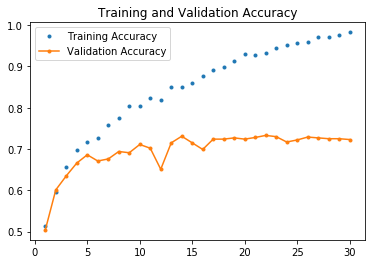

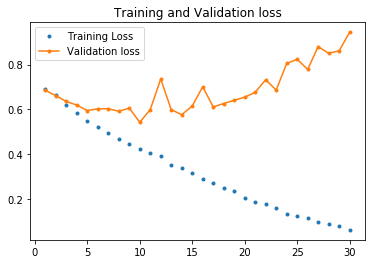

In [52]:
_ = plt.plot(epochs, acc, marker = '.', linestyle = 'none')
_ = plt.plot(epochs, val_acc, marker = '.')
_ = plt.legend(('Training Accuracy', 'Validation Accuracy'), loc = 'upper left')
plt.title('Training and Validation Accuracy')
plt.show()
plt.figure()
_ = plt.plot(epochs, loss, marker = '.', linestyle = 'none')
_ = plt.plot(epochs, val_loss, marker = '.')
_ = plt.legend(('Training Loss', 'Validation loss'), loc = 'upper left')
plt.title('Training and Validation loss')
plt.show()

The above plots show overfitting because validation loss is inreasing whereas training loss is decreasing. The main reason of overfitting is that we have less data


# Using Data Augmentation

-------------- ## Example ----------------------------

In [53]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

In [55]:
from keras.preprocessing import image

In [57]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size = (150, 150))

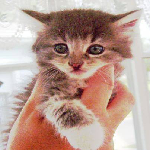

In [58]:
img

In [65]:
x = image.img_to_array(img) #converting to numpy array
x = x.reshape((1,) + x.shape) #reshape it to (1, 150, 150 ,3)

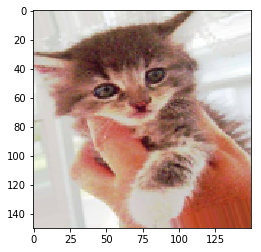

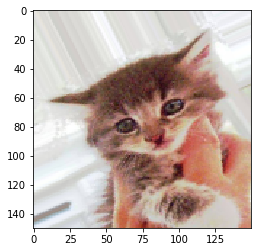

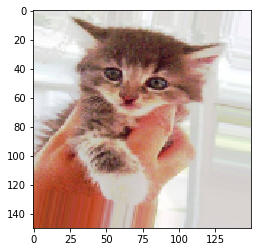

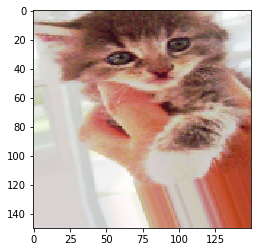

In [66]:
i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

Data Augemtation will not completely get rid of overfitting so we will also use dropout layer in the model

In [67]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

In [71]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255) #Validation layer will not have Data Augmentation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 173s 2s/step - loss: 0.6902 - acc: 0.5325 - val_loss: 0.6718 - val_acc: 0.5717
Epoch 2/100
100/100 [==============================] - 198s 2s/step - loss: 0.6795 - acc: 0.5722 - val_loss: 0.6585 - val_acc: 0.5999
Epoch 3/100
100/100 [==============================] - 208s 2s/step - loss: 0.6632 - acc: 0.5962 - val_loss: 0.6385 - val_acc: 0.6288
Epoch 4/100
100/100 [==============================] - 238s 2s/step - loss: 0.6475 - acc: 0.6184 - val_loss: 0.7072 - val_acc: 0.5522
Epoch 5/100
100/100 [==============================] - 241s 2s/step - loss: 0.6326 - acc: 0.6384 - val_loss: 0.6214 - val_acc: 0.6453
Epoch 6/100
100/100 [==============================] - 241s 2s/step - loss: 0.6164 - acc: 0.6538 - val_loss: 0.5773 - val_acc: 0.6933
Epoch 7/100
100/100 [==============================] - 242s 2s/step - loss: 0.6111 - acc: 0.6631 - val_loss: 0.5

100/100 [==============================] - 37006s 370s/step - loss: 0.4065 - acc: 0.8178 - val_loss: 0.4503 - val_acc: 0.7758
Epoch 62/100
100/100 [==============================] - 174s 2s/step - loss: 0.4033 - acc: 0.8109 - val_loss: 0.4252 - val_acc: 0.8109
Epoch 63/100
100/100 [==============================] - 168s 2s/step - loss: 0.4017 - acc: 0.8156 - val_loss: 0.4278 - val_acc: 0.7880
Epoch 64/100
100/100 [==============================] - 191s 2s/step - loss: 0.4022 - acc: 0.8166 - val_loss: 0.4367 - val_acc: 0.8106
Epoch 65/100
100/100 [==============================] - 186s 2s/step - loss: 0.3963 - acc: 0.8150 - val_loss: 0.4116 - val_acc: 0.8236
Epoch 66/100
100/100 [==============================] - 169s 2s/step - loss: 0.3908 - acc: 0.8247 - val_loss: 0.4265 - val_acc: 0.8228
Epoch 67/100
100/100 [==============================] - 172s 2s/step - loss: 0.3981 - acc: 0.8187 - val_loss: 0.5164 - val_acc: 0.7900
Epoch 68/100
100/100 [==============================] - 182s 2s/

In [72]:
model.save('cats_and_dogs_small_2.h5')

In [73]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

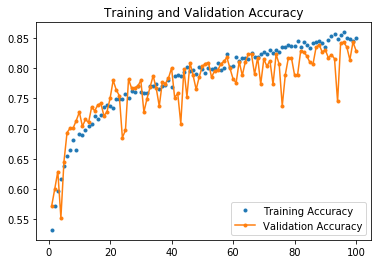

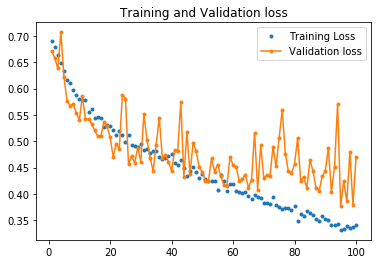

In [76]:
_ = plt.plot(epochs, acc, marker = '.', linestyle = 'none')
_ = plt.plot(epochs, val_acc, marker = '.')
_ = plt.legend(('Training Accuracy', 'Validation Accuracy'), loc = 'lower right')
plt.title('Training and Validation Accuracy')
plt.show()
plt.figure()
_ = plt.plot(epochs, loss, marker = '.', linestyle = 'none')
_ = plt.plot(epochs, val_loss, marker = '.')
_ = plt.legend(('Training Loss', 'Validation loss'), loc = 'upper right')
plt.title('Training and Validation loss')
plt.show()

# Using a Pretrained Convnet

In [80]:
from keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet',
                 include_top = False, #whether to include the dense layers or not
                 input_shape = (150, 150, 3)) #the input shape of our picture

In [81]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

# Fast Feature Extraction Without Data Augmentation
in this we save the predcition form conv base and then apply them separately on a densely connected classifier

### Extracting features using the pretrained convolution


In [84]:
import numpy as np

In [82]:
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size = (150, 150),
        batch_size = batch_size,
        class_mode = 'binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [85]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [86]:
#flattening the features so that they can be used in densely connected classifier

In [87]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [91]:
#Defining the densely connected classifier
model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr = 2e-5),
             loss = 'binary_crossentropy',
             metrics = ['acc'])
history = model.fit(train_features, train_labels,
                    epochs = 30,
                    batch_size = 20,
                   validation_data = (validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6174 - acc: 0.6545 - val_loss: 0.4307 - val_acc: 0.8340
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4275 - acc: 0.8045 - val_loss: 0.3561 - val_acc: 0.8650
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3506 - acc: 0.8510 - val_loss: 0.3256 - val_acc: 0.8610
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3067 - acc: 0.8765 - val_loss: 0.2991 - val_acc: 0.8770
Epoch 5/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2735 - acc: 0.8925 - val_loss: 0.2818 - val_acc: 0.8880
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2556 - acc: 0.8980 - val_loss: 0.2730 - val_acc: 0.8880
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2388 - acc: 0.9095 - val_loss: 0.2627 - val_acc: 0.8980
Epoch 8/30
200

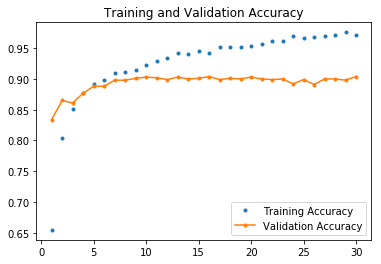

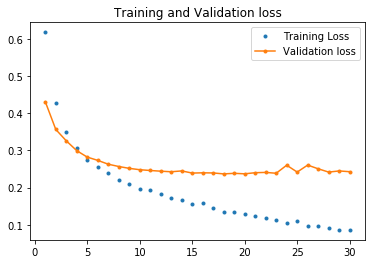

In [92]:
#lets look at the loss and accuracy curve
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
_ = plt.plot(epochs, acc, marker = '.', linestyle = 'none')
_ = plt.plot(epochs, val_acc, marker = '.')
_ = plt.legend(('Training Accuracy', 'Validation Accuracy'), loc = 'lower right')
plt.title('Training and Validation Accuracy')
plt.show()
plt.figure()
_ = plt.plot(epochs, loss, marker = '.', linestyle = 'none')
_ = plt.plot(epochs, val_loss, marker = '.')
_ = plt.legend(('Training Loss', 'Validation loss'), loc = 'upper right')
plt.title('Training and Validation loss')
plt.show()

## Feature Extraction With Data Augmentation
In this the pre trained conv base and our densely connected classifier are combined in one model.

In [94]:
#This technique is too much resource expensive so it should only be done on a GPU
np.random.seed(3)
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [95]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


before you compile and train the model it is very important to freeze the convolution base so that the representations that were learned previously should not be modifed and the densley layers on top of the conv are randomly organized so a very large update would be required to modify all of the parameters.

In [96]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [100]:
#Note that in order for these change to take affect we must always compile the model 

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./255)

In [103]:
train_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

valdiation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode='binary')

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 2e-5),
            metrics = ['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 1039s 10s/step - loss: 0.5216 - acc: 0.7565 - val_loss: 0.3923 - val_acc: 0.8679
Epoch 2/30
100/100 [==============================] - 835s 8s/step - loss: 0.3627 - acc: 0.8585 - val_loss: 0.3289 - val_acc: 0.8769
Epoch 3/30
100/100 [==============================] - 839s 8s/step - loss: 0.3008 - acc: 0.8835 - val_loss: 0.2888 - val_acc: 0.8982
Epoch 4/30
100/100 [==============================] - 806s 8s/step - loss: 0.2644 - acc: 0.9025 - val_loss: 0.2733 - val_acc: 0.9029
Epoch 5/30
100/100 [==============================] - 1002s 10s/step - loss: 0.2380 - acc: 0.9135 - val_loss: 0.2532 - val_acc: 0.9066
Epoch 6/30
100/100 [==============================] - 1210s 12s/step - loss: 0.2146 - acc: 0.9165 - val_loss: 0.2659 - val_acc: 0.8978
Epoch 7/30
100/100 [==============================] - 1202s 12s/step - loss: 0.2003 - acc: 0.9280 - val_loss: 0.

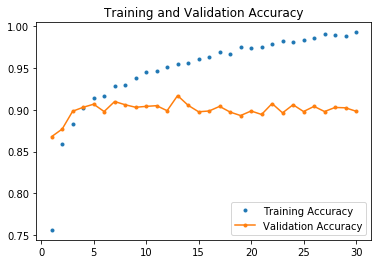

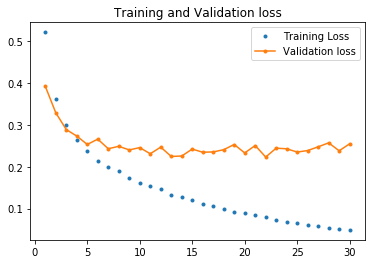

In [104]:
#lets look at the loss and accuracy curve
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
_ = plt.plot(epochs, acc, marker = '.', linestyle = 'none')
_ = plt.plot(epochs, val_acc, marker = '.')
_ = plt.legend(('Training Accuracy', 'Validation Accuracy'), loc = 'lower right')
plt.title('Training and Validation Accuracy')
plt.show()
plt.figure()
_ = plt.plot(epochs, loss, marker = '.', linestyle = 'none')
_ = plt.plot(epochs, val_loss, marker = '.')
_ = plt.legend(('Training Loss', 'Validation loss'), loc = 'upper right')
plt.title('Training and Validation loss')
plt.show()